- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
%reset -f

import warnings
warnings.filterwarnings(action="once")

import logging
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

import pandas as pd
# to compute time of pipeline
from time import time, strftime, gmtime

#from preprocess_NLP import *
from common_graphs import *

import os
import tensorflow as tf
import tensorflow_hub as hub
#import tensorflow_text


from bag_of_words import *
from Word2Vec import *
from BERT import *
from transformers import TFAutoModel
from USE import *



%matplotlib inline
%autosave 300

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "final_data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"

## Part II : Transformations

In [3]:
data = pd.read_csv(input_file)

In [4]:
data

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6
...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker pack doubl...,extra larg self adhes sticker,215,5
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker pack bring home exc...,larg vinyl sticker sticker,135,4
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...,extra larg sticker,16,3
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...,medium vinyl sticker sticker,10,4


#### 1) Bag of Words : Count words + TF-IDF

In [5]:
l_cat = list(set(data['category']))
l_cat

print("catégories : ", l_cat)
y_cat_num = data["target"]### ?? ## [(1-l_cat.index(data.iloc[i]['category'])) for i in range(len(data))]
y_cat_num

catégories :  ['Baby Care', 'Kitchen & Dining', 'Home Furnishing', 'Beauty and Personal Care', 'Home Decor & Festive Needs', 'Computers', 'Watches']


0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: target, Length: 1050, dtype: int64

In [6]:
data

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6
...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker pack doubl...,extra larg self adhes sticker,215,5
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker pack bring home exc...,larg vinyl sticker sticker,135,4
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...,extra larg sticker,16,3
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...,medium vinyl sticker sticker,10,4


#### 1) fit / transform description - text

##### 1) Préparation sentences

In [7]:
data[["text", "product_name"]].squeeze()

,text,product_name
0,Key Features of Elegance Polyester Multicolor ...,Elegance Polyester Multicolor Abstract Eyelet ...
1,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas Cotton Bath Towel
2,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa Cotton Terry Face Towel Set
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION Cotton Printed King size...
4,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print Cotton Floral King sized Double B...
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower Extra Large Self Adhesive Sticker
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra Large Vinyl Sticker Sticker
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe Extra Large Pigmented Polyvinyl Films...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra Medium Vinyl Sticker Sticker


In [8]:
feat = ['text'] # 'text' 0.399 et 0.5567

In [9]:
cv_transform, ctf_transform = create_bag_of_words_vectors(data, feat, feat)

Count Vector
TF-IDF


In [10]:
print(cv_transform.shape)
print(ctf_transform.shape)

(1050, 5843)
(1050, 5843)


##### 2) Exécution des modèles

In [11]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


CountVectorizer : 
-----------------
ARI :  0.399 time :  15.0

Tf-idf : 
--------
ARI :  0.5567 time :  14.0


##### 3) Graphiques

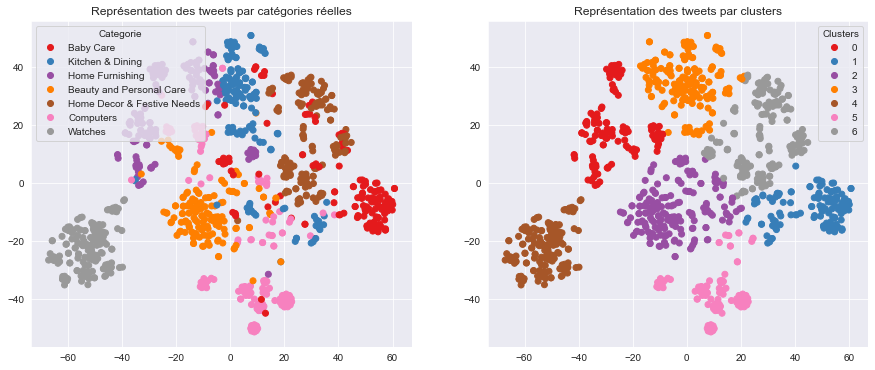

ARI :  0.5567


In [12]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

#### 2) fit / transform product_name + text

##### 1) Préparation sentences

In [13]:
# création du bag of words (CountVectorizer et Tf-idf)
print("Separate vocabulary")

textual_columns = ['product_name', 'text']

cv_transform, ctf_transform = create_bag_of_words_vectors(data, textual_columns, textual_columns)


Separate vocabulary
Count Vector
TF-IDF


In [14]:
print(cv_transform.shape)
print(ctf_transform.shape)

(1050, 8140)
(1050, 8140)


##### 2) Exécution des modèles

In [15]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


CountVectorizer : 
-----------------
ARI :  0.4025 time :  15.0

Tf-idf : 
--------
ARI :  0.5585 time :  13.0


##### 3) Graphiques

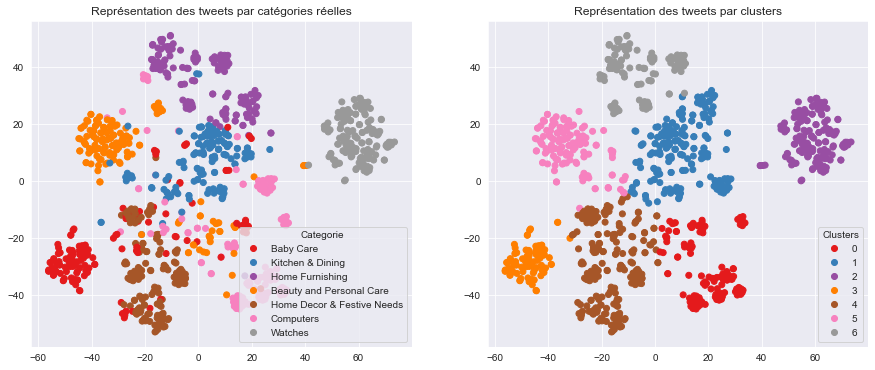

ARI :  0.5585


In [16]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

#### 3) fit product_name / transform text

##### 1) Préparation sentences

In [21]:
# création du bag of words (CountVectorizer et Tf-idf)

feat_fit = ['product_name']
feat_transform = ['text']

cv_transform, ctf_transform = create_bag_of_words_vectors(data, feat_fit, feat_transform)

Count Vector
TF-IDF


In [22]:
print(cv_transform.shape)
print(ctf_transform.shape)

(1050, 2297)
(1050, 2297)


##### 2) Exécution des modèles

In [23]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, l_cat, y_cat_num)


CountVectorizer : 
-----------------
ARI :  0.3584 time :  16.0

Tf-idf : 
--------
ARI :  0.3514 time :  16.0


##### 3) Graphiques

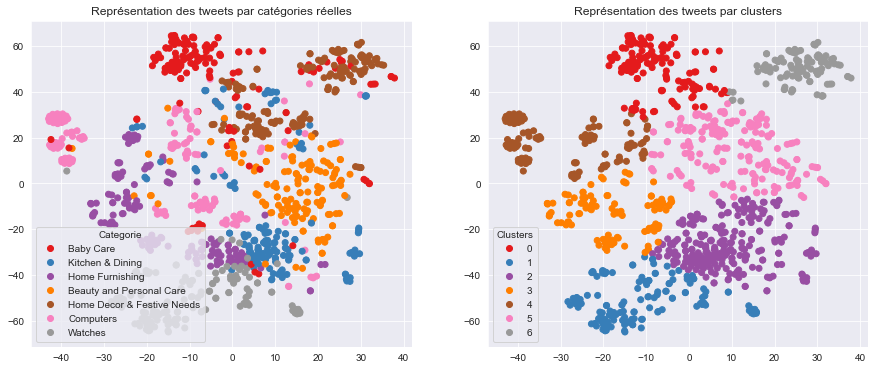

ARI :  0.3514


In [24]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

### II) Words Embeddings : Word2Vec

##### 1) Création du modèle Word2Vec

In [25]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data['clean_text'].to_list() # text : 0.19 ARI
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [26]:
w2v_words, model_vectors = create_w2v_model(sentences, w2v_min_count, w2v_size, w2v_window, w2v_epochs)

Build & train Word2Vec model ...
Vocabulary size: 2518
Word2Vec trained


In [27]:
# Préparation des sentences (tokenization)
x_sentences, tokenizer = tokenize_sentences(sentences, maxlen)

Fit Tokenizer ...
Number of unique words: 2519


##### 3) Création de la matrice d'embedding

In [28]:
# Création de la matrice d'embedding

embedding_matrix, vocab_size = create_embedding_matrix(w2v_words, model_vectors, tokenizer)

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (2519, 300)


##### 4) Création du modèle d'embedding

In [29]:
# Création du modèle

embed_model = create_embedding_model(x_sentences, maxlen, vocab_size, w2v_size, embedding_matrix)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           755700    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 755,700
Trainable params: 755,700
Non-trainable params: 0
_________________________________________________________________


##### 5) Exécution du modèle

In [30]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [31]:
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)

ARI :  0.3772 time :  15.0


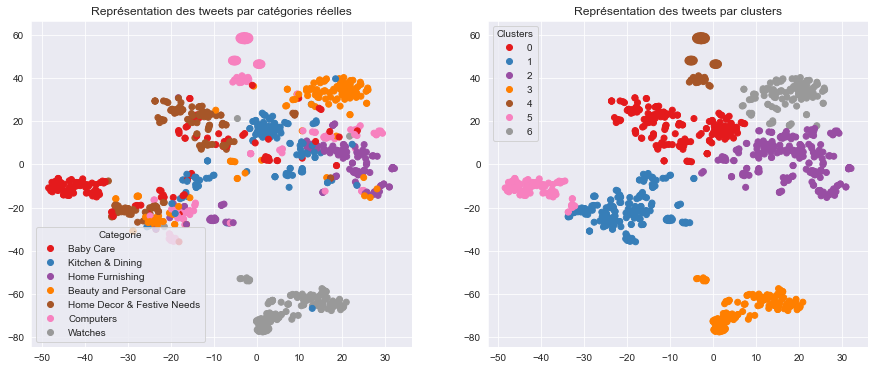

ARI :  0.3772


In [32]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

### III) Words Embeddings : BERT

https://www.tensorflow.org/text/guide/word_embeddings

In [33]:
os.environ["TF_KERAS"]='1'

In [34]:
print(tf.__version__)
#print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.1
Num GPUs Available:  0
True


#### 1) BERT HuggingFace

##### 1.1) 'bert-base-uncased'

In [35]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['product_name'].to_list() # clean_text 0.29

In [36]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 873ms/step
temps traitement :  117.0


In [37]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI :  0.6187 time :  18.0


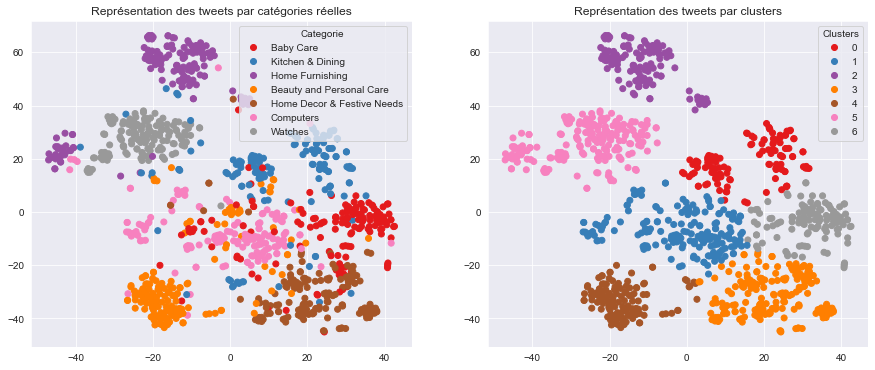

ARI :  0.6187


In [38]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### 1.2) "..."
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [79]:
sentences = data['text'].to_list()

In [97]:
max_length = 64
batch_size = 10
model_type = "sampathkethineedi/industry-classification"
    #"Kk2k/distilbert_e-commerce_data"
#'MyOrg123/all-intent-classification'
# "Kk2k/distilbert_e-commerce_data"
# "sampathkethineedi/industry-classification"
# "LiYuan/amazon-query-product-ranking"
#model = TFAutoModel.from_pretrained(model_type, from_pt=True)


In [95]:
sentences[1]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel'

In [98]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/58.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

NotImplementedError: in user code:

    File "C:\Users\oumei\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\oumei\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\oumei\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\oumei\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\oumei\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_file2f3vtdjx.py", line 36, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_filefs46b2j3.py", line 10, in tf__call
        outputs = ag__.converted_call(ag__.ld(self).distilbert, (), dict(input_ids=ag__.ld(input_ids), attention_mask=ag__.ld(attention_mask), head_mask=ag__.ld(head_mask), inputs_embeds=ag__.ld(inputs_embeds), output_attentions=ag__.ld(output_attentions), output_hidden_states=ag__.ld(output_hidden_states), return_dict=ag__.ld(return_dict), training=ag__.ld(training)), fscope)
    File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_file2f3vtdjx.py", line 36, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_filekfzg1pp4.py", line 91, in tf__call
        ag__.if_stmt(ag__.ld(head_mask) is not None, if_body_4, else_body_4, get_state_4, set_state_4, ('head_mask',), 1)
    File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_filekfzg1pp4.py", line 86, in if_body_4
        raise ag__.ld(NotImplementedError)

    NotImplementedError: Exception encountered when calling layer "tf_distil_bert_model_4" "                 f"(type TFDistilBertModel).
    
    in user code:
    
        File "C:\ProgramData\Anaconda3\lib\site-packages\transformers\modeling_tf_utils.py", line 1090, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "C:\ProgramData\Anaconda3\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 561, in call  *
            outputs = self.distilbert(
        File "C:\Users\oumei\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_file2f3vtdjx.py", line 36, in tf__run_call_with_unpacked_inputs
            retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
        File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_filekfzg1pp4.py", line 91, in tf__call
            ag__.if_stmt(ag__.ld(head_mask) is not None, if_body_4, else_body_4, get_state_4, set_state_4, ('head_mask',), 1)
        File "C:\Users\oumei\AppData\Local\Temp\__autograph_generated_filekfzg1pp4.py", line 86, in if_body_4
            raise ag__.ld(NotImplementedError)
    
        NotImplementedError: Exception encountered when calling layer "distilbert" "                 f"(type TFDistilBertMainLayer).
        
        in user code:
        
            File "C:\ProgramData\Anaconda3\lib\site-packages\transformers\modeling_tf_utils.py", line 1090, in run_call_with_unpacked_inputs  *
                return func(self, **unpacked_inputs)
            File "C:\ProgramData\Anaconda3\lib\site-packages\transformers\models\distilbert\modeling_tf_distilbert.py", line 406, in call  *
                raise NotImplementedError
        
            NotImplementedError: 
        
        
        Call arguments received by layer "distilbert" "                 f"(type TFDistilBertMainLayer):
          • self=tf.Tensor(shape=(10, 64), dtype=int64)
          • input_ids=None
          • attention_mask=tf.Tensor(shape=(10, 64), dtype=int64)
          • head_mask=tf.Tensor(shape=(10, 64), dtype=int64)
          • inputs_embeds=None
          • output_attentions=False
          • output_hidden_states=False
          • return_dict=True
          • training=False
    
    
    Call arguments received by layer "tf_distil_bert_model_4" "                 f"(type TFDistilBertModel):
      • self=('tf.Tensor(shape=(10, 64), dtype=int32)', 'tf.Tensor(shape=(10, 64), dtype=int32)', 'tf.Tensor(shape=(10, 64), dtype=int32)')
      • input_ids=None
      • attention_mask=None
      • head_mask=None
      • inputs_embeds=None
      • output_attentions=None
      • output_hidden_states=None
      • return_dict=None
      • training=False


In [99]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI :  0.316 time :  14.0


#### 2) BERT hub Tensorflow

In [42]:
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [43]:
sentences = data['text'].to_list()

In [44]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  95.0


In [45]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI :  0.316 time :  15.0


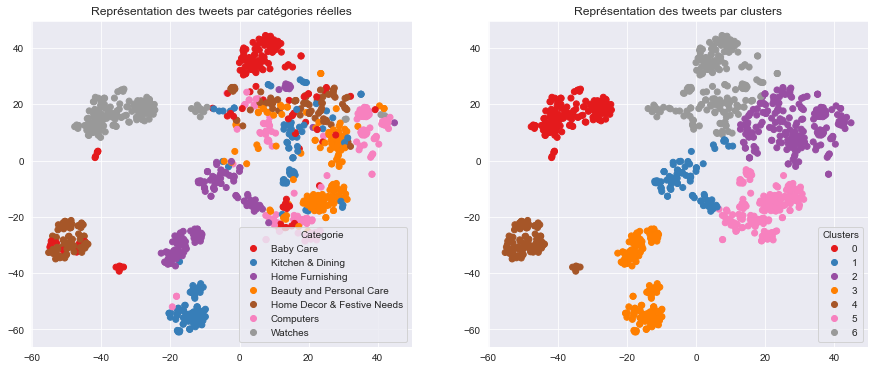

ARI :  0.316


In [46]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

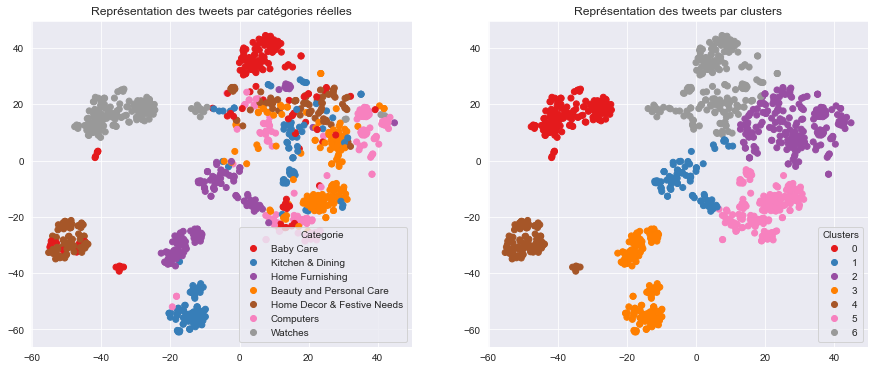

ARI :  0.316


In [100]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

### IV) Words Embeddings : USE (Universal Sentence Encoder)

https://tfhub.dev/google/universal-sentence-encoder/4

In [47]:
os.environ["TF_KERAS"]='1'

In [48]:
print(tf.__version__)
#print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.1
Num GPUs Available:  0
True


In [49]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

##### Using product_name

In [63]:
batch_size = 10
sentences = data['product_name'].to_list() # no preprocessing better !! ? to check

In [64]:
features_USE = feature_USE_fct(embed, sentences, batch_size)

temps traitement :  0.0


In [52]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

ARI :  0.7094 time :  18.0


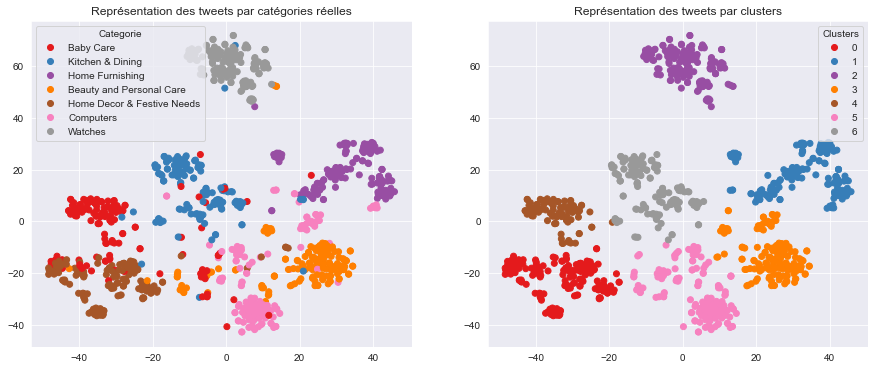

ARI :  0.7094


In [53]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

##### Using text / clean_text : cleaned or not

In [65]:
batch_size = 10
sentences = data['text'].to_list() # no preprocessing better !! ? to check

In [66]:
features_USE = feature_USE_fct(embed, sentences, batch_size)

temps traitement :  1.0


In [67]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

ARI :  0.3824 time :  13.0


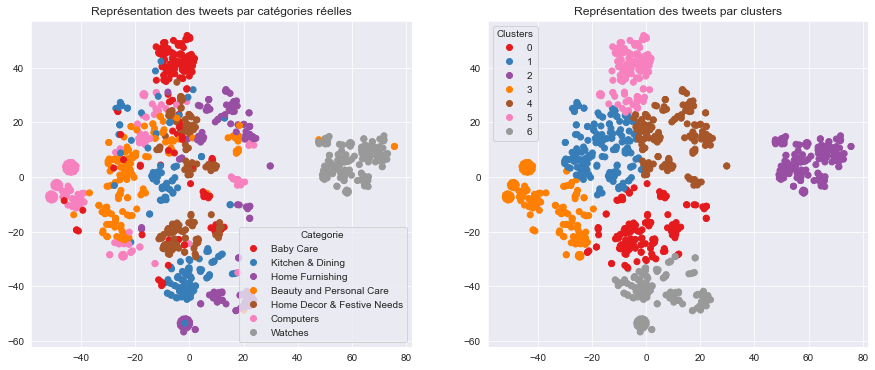

ARI :  0.3824


In [68]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

In [59]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 704.102204 sec
computing time : 00:11:44
